# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
api_key

'e316f91094d626c046b3077c84c0d13e'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
city_name = []
country = []
max_temp = []
wind_speed = []
cloudiness = []
humidity = []
lat = []
long = []
date = []

In [6]:
record_value = 0
set_value = 1

In [7]:
for city in cities:
        
    try:          
        payload = {
            "appid": api_key,
            "q": city,
            "units": "imperial"
        }
        r = requests.get(url, params=payload).json()
        city_name.append(r["name"])
        country.append(r["sys"]["country"])
        max_temp.append(r["main"]["temp_max"])
        wind_speed.append(r["wind"]["speed"])
        cloudiness.append(r["clouds"]["all"])
        humidity.append(r["main"]["humidity"])
        lat.append(r["coord"]["lat"])
        long.append(r["coord"]["lon"])
        date.append(r["dt"])
        
        if record_value < 50:
            print("Processing Record " + str(record_value) + " of Set " + str(set_value) + " | " + city + ", " + str(r["id"]))
            record_value += 1
        else:
            record_value = 0
            set_value += 1
            
        
    except:
        print("City not found. Skipping...")

Processing Record 0 of Set 1 | punta arenas, 3874787
City not found. Skipping...
Processing Record 1 of Set 1 | sosenskiy, 490437
Processing Record 2 of Set 1 | arraial do cabo, 3471451
Processing Record 3 of Set 1 | dedougou, 2361477
City not found. Skipping...
Processing Record 4 of Set 1 | port hedland, 2063042
Processing Record 5 of Set 1 | rikitea, 4030556
Processing Record 6 of Set 1 | isangel, 2136825
Processing Record 7 of Set 1 | cape town, 3369157
Processing Record 8 of Set 1 | bandarbeyla, 64814
Processing Record 9 of Set 1 | broome, 2656067
Processing Record 10 of Set 1 | havoysund, 779622
Processing Record 11 of Set 1 | ushuaia, 3833367
Processing Record 12 of Set 1 | kaeo, 2189343
Processing Record 13 of Set 1 | atuona, 4020109
Processing Record 14 of Set 1 | kahului, 5847411
Processing Record 15 of Set 1 | mataura, 6201424
Processing Record 16 of Set 1 | barrow, 3833859
Processing Record 17 of Set 1 | orocue, 3673536
Processing Record 18 of Set 1 | amahai, 1651591
Proces

In [8]:
len(city_name)

529

In [9]:
weather_data = pd.DataFrame({"Name": city_name,
              "Country": country,
              "Latitude": lat,
              "Longitude": long,
              "Max Temperature": max_temp,
              "Cloudiness": cloudiness,
              "Date": date,
              "Humidity": humidity,
              "Wind Speed": wind_speed,
})
weather_data


,Name,Country,Latitude,Longitude,Max Temperature,Cloudiness,Date,Humidity,Wind Speed
0,Punta Arenas,CL,-53.16,-70.91,69.80,96,1577909650,37,19.46
1,Sosenskiy,RU,54.06,35.96,28.40,58,1577910241,79,6.71
2,Arraial do Cabo,BR,-22.97,-42.02,87.80,100,1577909653,65,21.92
3,Dedougou,BF,12.47,-3.47,70.50,0,1577910242,12,9.24
4,Port Hedland,AU,-20.31,118.58,86.00,40,1577909801,79,9.17
...,...,...,...,...,...,...,...,...,...
524,Suratgarh,IN,29.32,73.90,50.25,100,1577910451,34,7.36
525,Dabakala,CI,8.36,-4.43,75.40,0,1577910452,17,3.24
526,Phuthaditjhaba,ZA,-28.53,28.82,60.49,26,1577910453,98,6.60
527,Cockburn Town,TC,21.46,-71.14,78.44,9,1577910280,67,5.21


In [10]:
weather_data.to_csv("Weather_Data")

#### Latitude vs. Temperature Plot

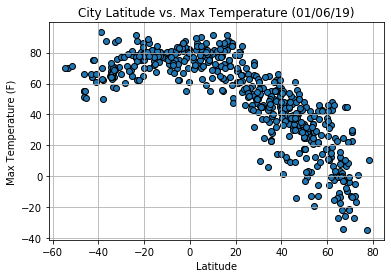

In [11]:
plt.title("City Latitude vs. Max Temperature (01/06/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid()

plt.scatter(weather_data["Latitude"],
           weather_data["Max Temperature"],
           edgecolors='black')

plt.savefig("Lat_v_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

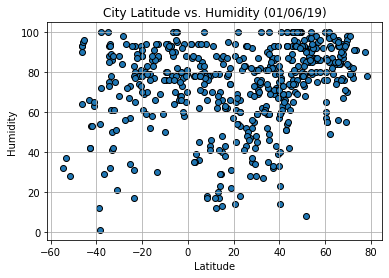

In [12]:
plt.title("City Latitude vs. Humidity (01/06/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

plt.scatter(weather_data["Latitude"],
           weather_data["Humidity"],
           edgecolors='black')

plt.savefig("Lat_v_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

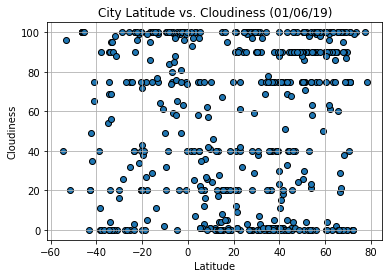

In [13]:
plt.title("City Latitude vs. Cloudiness (01/06/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

plt.scatter(weather_data["Latitude"],
           weather_data["Cloudiness"],
           edgecolors='black')

plt.savefig("Lat_v_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

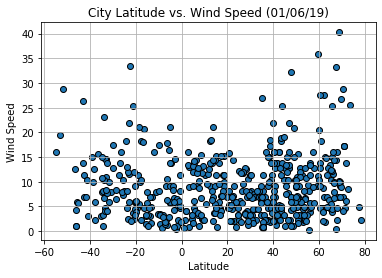

In [14]:
plt.title("City Latitude vs. Wind Speed (01/06/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

plt.scatter(weather_data["Latitude"],
           weather_data["Wind Speed"],
           edgecolors='black')

plt.savefig("Lat_v_Windspeed.png")
plt.show()